## Robot Learning

## Assignment 1

#### Group names: Kaywan, Nicolas, Deepak Badarinath

### Introduction


Please read the theoretical questions and practical tasks below, and answer them in a text or code cell as suitable.

### Task 1

Derive  *Bayes’ Theorem* starting with the definition of conditional probabilities.

<div style="text-align: right; font-weight:bold"> 3 Points </div>

#### Answer
Let $A$ and $B$ be events in some sample space $S$ with probability measure $P$.

The conditional probability of A given B, $P(A|B) := \frac{P(A \cap B)}{P(B)}$, where $A\cap B$ is the event that both A and B occur.

$\mathbf{Bayes\, Theorem}:$ $$P(A|B) = \frac{P(A) * P(B|A)}{P(B)}$$

$\mathbf{Proof}$ $$P(A\cap B) = P(A) * P(B|A)$$
and $$P(A\cap B) = P(B) * P(A|B)$$ 

Equating both terms: 
$$P(B) * P(A|B) = P(A) * P(B|A)$$
resulting in the Bays' Theorem:
$$P(A|B) = \frac{P(A) * P(B|A)}{P(B)}$$

### Task 2

Derive the closed-loop transfer function $G(s)$ of the complete control loop with controller, actuator, additive noise, plant and sensor (feedback).

<div style="text-align: right; font-weight:bold"> 3 Points </div>

#### Answer
The closed-loop traansfer Function: $G(S)$
The input $X(S)$
The output $Y(S)$
The controller $C(S)$
The Actuator $A(S)$
The Noise $N(S)$
The Plant $P(S)$
The Feedback(sensor) $F(S)$

 The closed-loop Function is defined as $$G(s) = \frac{Y(S)}{X(S)}$$
 The output Signal $Y(s)$ is defined by the calculation of the chain of connected blocks which means:
 $$Y(S)= E(S)*((C(S)*A(S)+N(S))*P(S))$$
 E(S) is defined by following equation:
 $$E(S)= X(S) - F(S)*Y(S)$$
 Substituiting $E(S)$ in the first equaation:
 $$Y(S)= (X(S) - F(S)*Y(S)) * ((C(S)*A(S)+N(S))*P(S)) $$
 $$Y(S)= (X(S)*((C(S)*A(S)+N(S))*P(S)) - F(S)*Y(S))*((C(S)*A(S)+N(S))*P(S)) $$
 $$(X(S)*((C(S)*A(S)+N(S))*P(S))  =  Y(S) + F(S)*Y(S))*((C(S)*A(S)+N(S))*P(S))$$
 $$(X(S)*((C(S)*A(S)+N(S))*P(S))  =  Y(S) * ( 1 + F(S)*((C(S)*A(S)+N(S))*P(S))$$
 $$Y(S)  = \frac{(X(S)*((C(S)*A(S)+N(S))*P(S))}{( 1 + F(S)*((C(S)*A(S)+N(S))*P(S))}$$
 Following $G(S)=\frac{Y(S)}{X(S)}$
 $$G(S)  = \frac{((C(S)*A(S)+N(S))*P(S)}{( 1 + F(S)*((C(S)*A(S)+N(S))*P(S))}$$

### Task 3

Propose a design for a reinforcement learning agent that plays *Guessing numbers with Nils*.

Please describe how you would shape the action-value function, how you would reward the agent, and how you would calculate the return and determine the policy. Furthermore, how would you set the initial values, and find a balance between exploration and exploitation?


<div style="text-align: right; font-weight:bold"> 1 Points </div>

#### Answer
#### Answer

Action-value function

The function should be designed in such a way that the interval in which the value could be located should always be halved. If the number we are looking for is greater than the estimated number, the interval above this number is used. Since the intervals always halve, it is only half as long as the original. If the number we are looking for is less than the estimated number, the one below this number is taken and halved.It is important that the feedback from the environment is whether the number we are looking for is greater, less or equal to the estimated number.

Reward the agent 

The agent is rewarded if he guesses the correct number (r = + 1). If the agent guesses wrongly, he gets r = -1

Calculation the return and determine the policy
The goal is to maximize the return r. So one should try to maximize r in the calculation.


Initial Values: 

The initial value should be generated randomly but close to the middle of the intervals. This means that the probability is almost the same that the estimate is in the upper or lower interval.

Balance between exploration and exploitation 

The balance between exploration and exploitation is that first a value is searched for at random (exploration) then the interval for the new value is searched for on the basis of the feedback (exploitation)



### Task 4

Please explain the role of the control parameter $\tau$ in the context of softmax action selection in a few words.

What happens as $\tau$ approaches infinity?

What is the effect of $\tau$ approaching zero?


<div style="text-align: right; font-weight:bold"> 3 Points </div>

#### Answer

Heuristically, $\tau$ represents the balance between exploitation and exploration of our policy. If $\tau$ is large, then our policy is favouring exploration over exploitation and if $\tau$ is small, policy is favouring exploitation over exploration .

The mathematical reasoning behind this heuristic is that

#### As $\tau$ approaches infinity
$P(a_{t}) = |A|^{-1}$ for all actions $a$ and for all times $t$, where $|A|$ is the size of the action space.

This is true as $exp(\frac{Q(a)}{\infty}) = 1$ for all actions $a$.

So we just do a random sampling of actions here.

Let $A^{*}$ be the set of actions for which $Q(a_{t})$ is maximum.

#### As $\tau$ approaches zero,

For all actions $b$ in $A^{*}$ we can see that in the limit $P(b) = |A^{*}|^{-1}$ 

For all $a$ not in $A^{*}$ we can see that in the limit $P(a) = 0$ 

So we just randomly sample between the optimal policies here.

### Task 5

In this notebook, write a function or a decorator that implements a sampling procedure for arbitrary probability distributions, where the density function has a bounded support. Specifically, the sampling should return values $x$, with $0.0 \leq x \leq 1.0$ distributed according to a given continuous probability density function $w(x)$. To clarify, the sampling should not be hardcoded, which means that its input could be an arbitrary $w(x)$ as described above, not just the distributions below.

Showcase your implementation by sampling from the following two probabiliy distributions:

1. Normal distribution around $\mu = 0.5$ and adjustable $\sigma$. Visualize for $\sigma = 0.2$.
2. U-quadratic distribution with $\alpha = 10$ and $\beta = 0.6$.

To show that your sampling works as specified, plot the PDF and the histogram resulting from $100k$ samples for each distribution above using $100$ bins. We are aware that there are many ways to go about solving this task. You may use all functions from all packages included in the *rl_kernel*. Also, feel free to create additional code or text cells if you need it to implement or explain your solution! For guidance on the visualization, you can find an example of a PDF plot and a histogram for some samples from a uniform distribution below.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

### Answer

Let $X$ be the continous random variable, with pdf $w(x)$ and support $[a,b]$. 

We construct discrete estimators $X_{n}$ of the random variable $X$ s.t as $n \rightarrow \infty$, $X_{n} \rightarrow X$.

Fix n

1. Partition $[a,b] = \sqcup_{i=0}^{n-1}[a_{i},b_{i})$, where $a_{i} := a + \frac{i(b-a)}{n}$ and $b_{i} := a_{i} + \frac{1}{n}$.

2. Calculate $p_{i} := \int_{a_{i}}^{b_{i}}w(x)dx$ for all i in range(n).

3. Let $X_{n}$ be the discrete random variable that takes the value $a_{i}$ with probability $p_{i}$.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad #for integration of w

In [61]:
def u(x):
    return 1

def uquad_pdf(x,alpha=10,beta=0.6):
    return alpha*((x-beta)**2)

def normal_pdf(x,sigma=0.2,mu=0.5):
    return np.exp(-(x-mu)**2/(2*(sigma**2))) * (1/(np.sqrt(2*np.pi)*sigma))

In [62]:
def sample_from_continous(w,a=0,b=1,n=10000,no_of_samples=1):
    left_points = np.linspace(a,b-(1/n),num=n)
    right_points = np.linspace(a+1/n,b,num=n)
    
    
    weights = []
    for i in range(n):
        weights.append(quad(w,left_points[i],right_points[i])[0]) 
    
    probabilites = np.array(weights)/sum(weights)
    #Sum of weights need not sum upto 1, so we need to normalize
    
    return np.random.choice(left_points,no_of_samples,p=probabilites)

In [63]:
sample_from_continous(normal,no_of_samples=10000)

array([0.6823, 0.5709, 0.8252, ..., 0.0091, 0.7472, 0.5995])

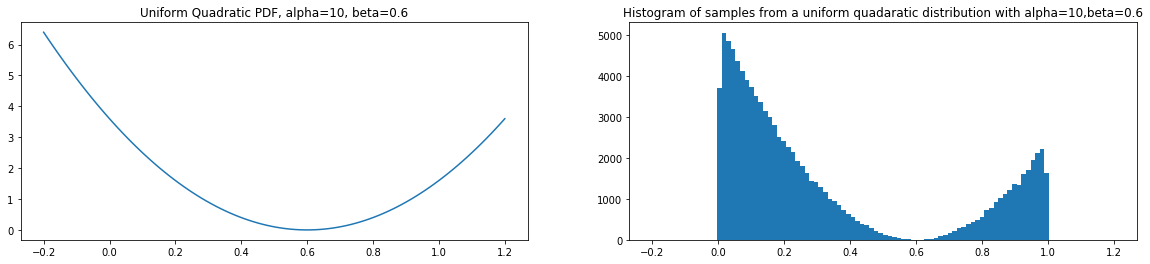

In [64]:
samples = sample_from_continous(uquad_pdf,no_of_samples=100000)

#create plot
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
#get equidistant points to plot PDF at
#it is good to leave a margin of 0.2 here on both sides to highlight the cut-off at the borders of [0., 1.]
X = np.linspace(-0.2,1.2,100)
#plot PDF
ax1.plot(X, uquad_pdf(X))
ax1.set_title('Uniform Quadratic PDF, alpha=10, beta=0.6')
#plot samples
ax2.hist(samples, bins=100, range=(-0.2,1.2))
ax2.set_title('Histogram of samples from a uniform quadaratic distribution with alpha=10,beta=0.6')
plt.show()

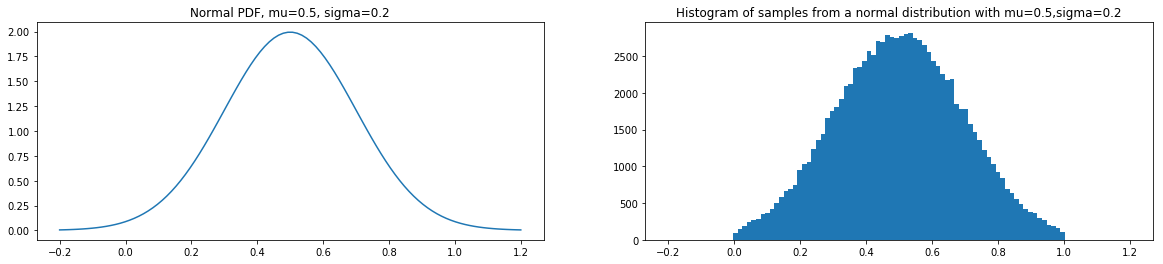

In [65]:
samples = sample_from_continous(normal_pdf,no_of_samples=100000)

#create plot
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))
#get equidistant points to plot PDF at
#it is good to leave a margin of 0.2 here on both sides to highlight the cut-off at the borders of [0., 1.]
X = np.linspace(-0.2,1.2,100)
#plot PDF
ax1.plot(X, normal_pdf(X))
ax1.set_title('Normal PDF, mu=0.5, sigma=0.2')
#plot samples
ax2.hist(samples, bins=100, range=(-0.2,1.2))
ax2.set_title('Histogram of samples from a normal distribution with mu=0.5,sigma=0.2')
plt.show()